In [178]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 

In [179]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv("data/test.csv")

In [180]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [181]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [182]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [183]:
df_train.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [184]:
df_train.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8688    False
8689    False
8690    False
8691    False
8692    False
Length: 8693, dtype: bool

## Missing values 
our data seems to have some missing values , now we should analyze the missing values and input appropriate values

In [185]:
df_train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [186]:
def percentage(df):

    percentage = (df.isna().sum() / len(df)) * 100
    return percentage


In [187]:
print(percentage(df_train))

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64


we can use this for plotting the missing values percetage wise , from the above observation it seems that Cryosleep seems to have the highest number of missing values . Now i would like to fill the categorial columns with the mode values and the numerical columns with median as median is unaffected against outliers


In [188]:
def fillMedian(df):
# Creating a method to iterate overcolumns and if the dtype is not object then we would we will the na values with median of that column
    for i in df.columns :
        if df[i].dtype != 'object' :
            df[i].fillna(df[i].median(),inplace = True)

    return df


In [189]:
def fillMode(df):
    
    for i in df.columns:
        if df[i].dtype == 'object' :
            df[i].fillna(df[i].mode()[0],inplace = True)
    
    return df

In [190]:
df_train = fillMedian(df_train)
df_train = fillMode(df_train)
print(df_train.isna().sum())

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64


In [191]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Looks like we filled the missing values with the median and mode for numerical columns and catergorial columns respectively .

## Outlier detection and removal 
now we should look at the distribution of columns and 

In [192]:
num = []

for i in df_train.columns:
    if df_train[i].dtype != 'object' and i != 'Transported' and  df_train[i].dtype != 'bool':
        num.append(i)

print(num)

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


In [193]:
print(df_train.head())

  PassengerId HomePlanet  CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa      False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth      False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa      False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa      False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth      False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         Tru

The skewness of the age column is 0.43110235678108527


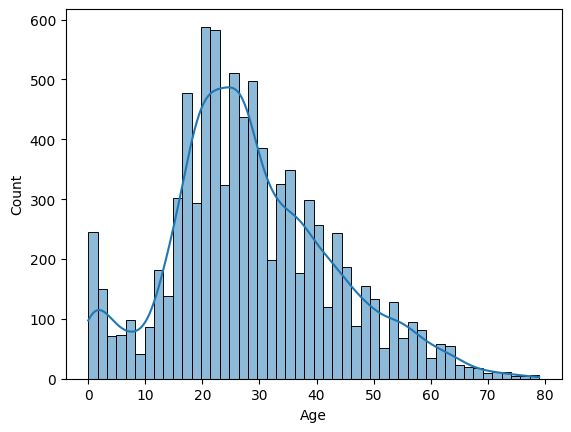

In [194]:

sns.histplot(df_train[num[0]] , x = df_train[num[0]] , kde = True )
print("The skewness of the age column is {}".format(df_train[num[0]].skew()))

In [195]:
print(num)

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


The age column is not normally distributed , to remove the outliers we have to use the IQR method

In [196]:
def IQR(df,i):

    IQR = df[i].quantile(0.75) - df[i].quantile(0.25)
    IQR_max = df[i].quantile(0.75) + 1.5*IQR
    IQR_min = df[i].quantile(0.25) - 1.5*IQR

    return IQR_max , IQR_min

In [197]:
for i in num:

    IQR_max , IQR_min = IQR(df_train,i)
    outliers = df_train[(df_train[i] < IQR_min) | (df_train[i] > IQR_max) ]
    
    print("The column {} had {} outliers".format(i,len(outliers)))

The column Age had 162 outliers
The column RoomService had 1906 outliers
The column FoodCourt had 1916 outliers
The column ShoppingMall had 1879 outliers
The column Spa had 1833 outliers
The column VRDeck had 1849 outliers


In [198]:
IQR = df_train[num[0]].quantile(0.75) - df_train[num[0]].quantile(0.25)
IQR_max = df_train[num[0]].quantile(0.75) + 1.5*IQR
print(IQR_max)

62.5


In [199]:
print(df_train.head())

  PassengerId HomePlanet  CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa      False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth      False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa      False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa      False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth      False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         Tru

In [200]:
df_train = df_train[df_train[num[0]] < IQR_max]

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0cc46ac220>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0cc46ac760>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0cc46e3f40>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0cc46acca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0cc46acf40>],
 'means': []}

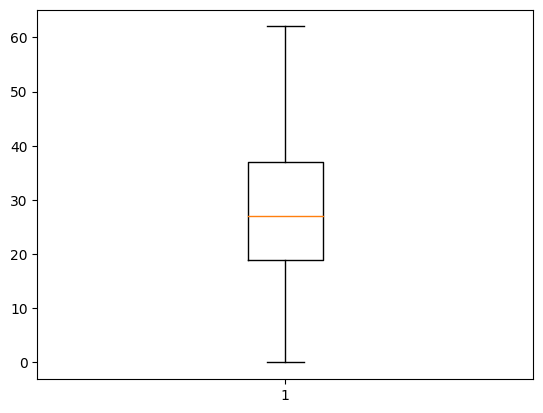

In [201]:
plt.boxplot(df_train[num[0]])

It seems like we removed the outliers for the age column now we should do it for the other numerical columns

In [202]:
for i in range(1,len(num)) :

    print("The {} column has skewness of {}".format(num[i],df_train[num[i]].skew()))

The RoomService column has skewness of 6.452252515554153
The FoodCourt column has skewness of 7.228237828716999
The ShoppingMall column has skewness of 12.74918169236743
The Spa column has skewness of 7.310986777324706
The VRDeck column has skewness of 7.938878744894799


All the above columns seem to be highly skewed , we can use mean standard deviation to remove the outlier so we have to use the IQR method to remove the outlier

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0cc465a290>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0cc465a7d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0cc4659ff0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0cc465ad10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0cc465afb0>],
 'means': []}

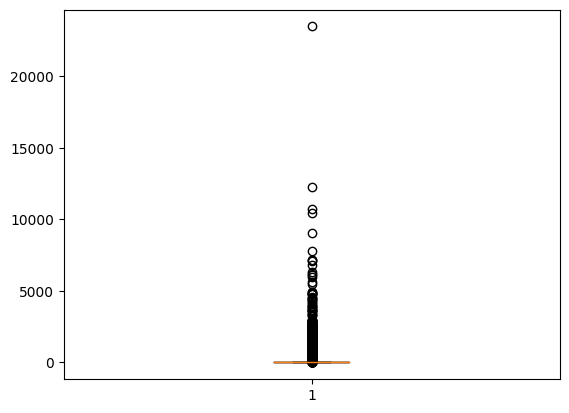

In [203]:
plt.boxplot(df_train[num[3]])

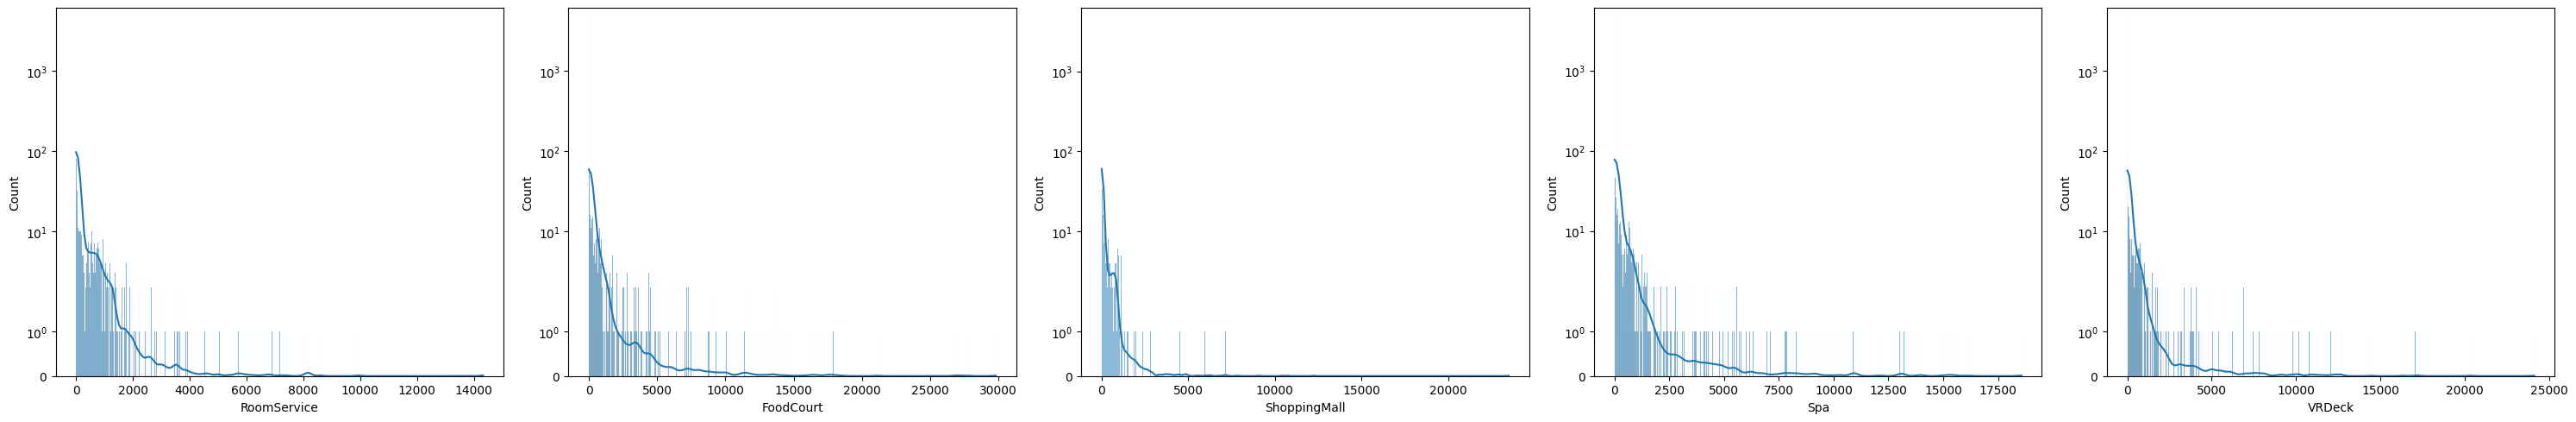

In [204]:
fig, ax = plt.subplots(nrows=1, ncols=len(num) - 1, figsize = (30,5))

sns.histplot(data = df_train, x = num[1] , ax = ax[0] , kde = True)
ax[0].set_xlabel("{}".format(num[1]))
ax[0].set_yscale('symlog')

sns.histplot(data = df_train, x = num[2] , ax = ax[1] , kde = True)
ax[1].set_xlabel("{}".format(num[2]))
ax[1].set_yscale('symlog')

sns.histplot(data = df_train, x = num[3] , ax = ax[2] , kde = True)
ax[2].set_xlabel("{}".format(num[3]))
ax[2].set_yscale('symlog')

sns.histplot(data = df_train, x = num[4] , ax = ax[3] , kde = True)
ax[3].set_xlabel("{}".format(num[4]))
ax[3].set_yscale('symlog')

sns.histplot(data = df_train, x = num[5] , ax = ax[4] , kde = True)
ax[4].set_xlabel("{}".format(num[5]))
ax[4].set_yscale('symlog')

plt.tight_layout()
plt.show()

the other numerical columns seem to have most of there values as 0 , which means huge amount of the didnt spend money during their travel we can combine all the columns  to people who spent money.

In [205]:
spent = df_train[num[1:]]

Spent = spent.sum(axis = 1)

total_spent = spent.sum(axis = 1)

Spent = Spent.apply(lambda x : 0 if x == 0 else 1)

df_train = df_train.join(pd.DataFrame(data = {'Spent' : Spent , 'Total_spent' : total_spent}))

In [206]:
df_train.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
Spent           0
Total_spent     0
dtype: int64

([<matplotlib.patches.Wedge at 0x7f0d58c88df0>,
 [Text(-0.01745463273394463, 1.1998730498665777, 'Transported'),
  Text(0.01745452039372218, -1.1998730515007932, 'Not Transported')],
 [Text(-0.010181869094801031, 0.6999259457555037, '50.5%'),
  Text(0.010181803563004606, -0.699925946708796, '49.5%')])

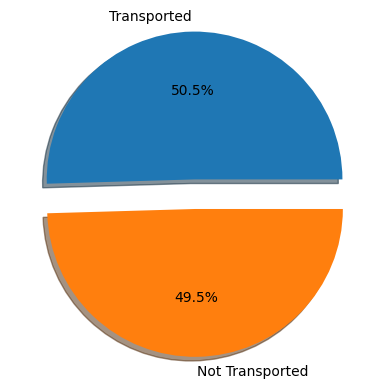

In [207]:
transported = df_train[df_train['Transported'] == 1]
not_transported = df_train[df_train['Transported'] == 0]
plt.pie([len(transported),len(not_transported)] , explode=[0.10,0.10] , shadow= True , labels=('Transported','Not Transported') , autopct='%1.1f%%')

Text(0.5, 1.0, 'Percentage of people opting for VIP')

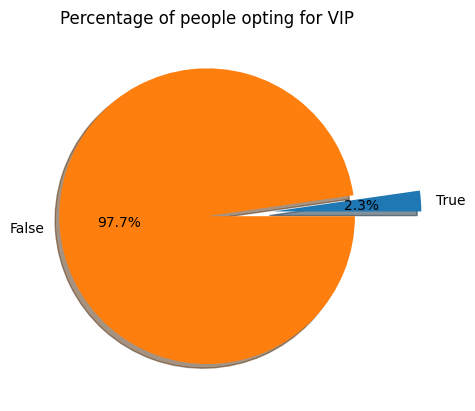

In [208]:
#Looking at the VIP column
true = df_train.VIP.value_counts().loc[True]
false = df_train.VIP.value_counts().loc[False]
plt.pie([true,false] , explode = [0.45,0.0] , shadow=True , labels = ['True','False'] , autopct='%1.1f%%')
plt.title("Percentage of people opting for VIP")

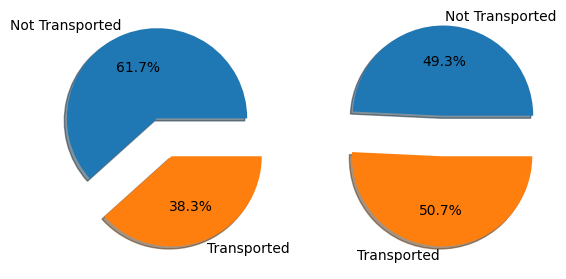

In [209]:
#People who got transported among VIP

fig , ax = plt.subplots(ncols=2 , nrows= 1)

temp = df_train[['VIP','Transported']]
false_transported = temp.groupby(['VIP']).sum().loc[False]
true_transported = temp.groupby(['VIP']).sum().loc[True]
true_not_tranported = true - true_transported
false_not_transported = false - false_transported

ax[0].pie([true_not_tranported[0],true_transported[0]] , labels = ['Not Transported','Transported'] ,explode = [0.45,0.0] , shadow=True , autopct='%1.1f%%' )
ax[0].set_label("VIPs")

ax[1].pie([false_not_transported[0],false_transported[0]] , labels = ['Not Transported','Transported'] ,explode = [0.45,0.0] , shadow=True , autopct='%1.1f%%' )
ax[1].set_label("Non - VIPs")

So , being a Non-VIP had higher odds od being transported to the correct positon

In [210]:
#Taking a look at the cabin column
deck = df_train['Cabin'].apply(lambda x : str(x).split('/')[0])
num = df_train['Cabin'].apply(lambda x : str(x).split('/')[1] if len(str(x).split('/')) > 1 else ' ') 
side = df_train['Cabin'].apply(lambda x : str(x).split('/')[2] if len(str(x).split('/')) > 2 else ' ')

In [211]:
print(deck.value_counts())
deck.replace(to_replace='nan' , value = deck.mode().loc[0] , inplace  = True)
print("The number of unique values is {}".format(deck.nunique()))

Cabin
F    2749
G    2709
E     862
B     761
C     728
D     468
A     249
T       5
Name: count, dtype: int64
The number of unique values is 8


In [212]:
#The num data has too many unique values
print("The number of unique values in num is {}".format(num.nunique()))
num.replace(to_replace=" " , value = num.mode().loc[0],inplace=True)
print(num.value_counts())


The number of unique values in num is 1815
Cabin
734     202
82       27
19       21
86       21
97       21
       ... 
1639      1
1277      1
1638      1
1636      1
1894      1
Name: count, Length: 1815, dtype: int64


In [213]:
print("The number of unique values in num is {}".format(side.nunique()))
side.replace(to_replace=" " , value = side.mode().loc[0],inplace=True)
print(side.value_counts())

The number of unique values in num is 2
Cabin
S    4401
P    4130
Name: count, dtype: int64


<Axes: xlabel='Cabin', ylabel='Count'>

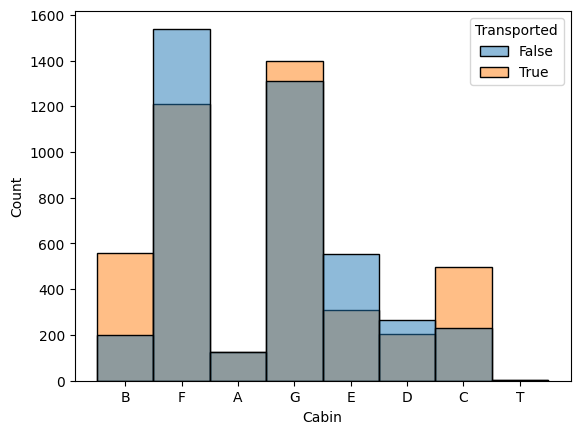

In [214]:
sns.histplot(data = deck , x = deck ,hue = df_train.Transported)

<Axes: xlabel='Cabin', ylabel='Count'>

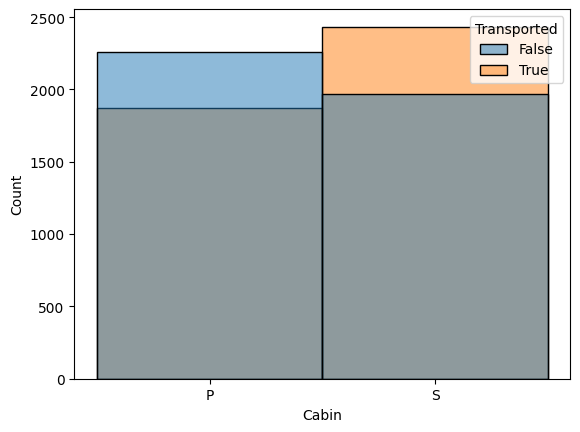

In [215]:
sns.histplot(data = side , x = side , hue = df_train.Transported)

People from Cabin S had higher chance of being transported 

In [216]:
df_train = pd.concat([df_train,pd.DataFrame(data={"Side" : side}), pd.DataFrame(data = {"Deck" : deck})], axis=1)
df_train.drop(columns = ['PassengerId','Cabin'],axis=1,inplace = True)
print(df_train.head())


  HomePlanet  CryoSleep  Destination   Age    VIP  RoomService  FoodCourt  \
0     Europa      False  TRAPPIST-1e  39.0  False          0.0        0.0   
1      Earth      False  TRAPPIST-1e  24.0  False        109.0        9.0   
2     Europa      False  TRAPPIST-1e  58.0   True         43.0     3576.0   
3     Europa      False  TRAPPIST-1e  33.0  False          0.0     1283.0   
4      Earth      False  TRAPPIST-1e  16.0  False        303.0       70.0   

   ShoppingMall     Spa  VRDeck               Name  Transported  Spent  \
0           0.0     0.0     0.0    Maham Ofracculy        False      0   
1          25.0   549.0    44.0       Juanna Vines         True      1   
2           0.0  6715.0    49.0      Altark Susent        False      1   
3         371.0  3329.0   193.0       Solam Susent        False      1   
4         151.0   565.0     2.0  Willy Santantines         True      1   

   Total_spent Side Deck  
0          0.0    P    B  
1        736.0    S    F  
2      1038

<Axes: xlabel='CryoSleep', ylabel='Count'>

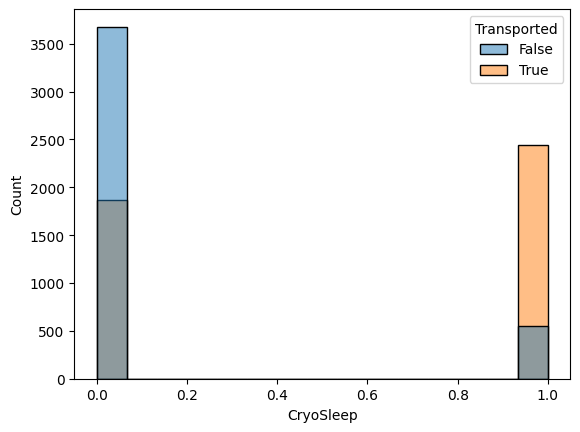

In [217]:
#People who opted for cryo sleep 
sns.histplot(data = df_train , x = df_train.CryoSleep.astype(np.int32) , hue = df_train.Transported)


In [218]:
temp = df_train[['Transported' , 'CryoSleep']]
false_transported = temp.groupby(['CryoSleep']).sum().loc[False][0]
true_transported = temp.groupby(['CryoSleep']).sum().loc[True][0]
false_total = temp.CryoSleep.value_counts().loc[False]
true_total = temp.CryoSleep.value_counts().loc[True]


In [219]:
print("Percentage of people that opted for cryosleep and Got transported {}".format((true_transported / true_total) * 100))
print("Percentage of people that opted for cryosleep and Got transported {}".format((false_transported / false_total) * 100))

Percentage of people that opted for cryosleep and Got transported 81.653833277536
Percentage of people that opted for cryosleep and Got transported 33.65800865800866


So people who opted for cryosleep had much higher chance of being transported to correct location 

<Axes: xlabel='HomePlanet', ylabel='Count'>

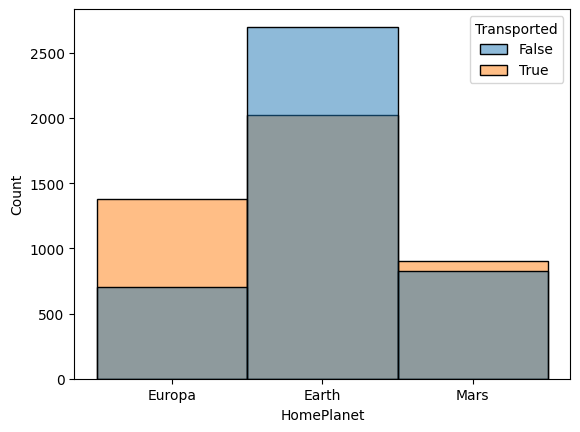

In [220]:
#Taking a look at homeplanet column
sns.histplot(data = df_train , x = df_train['HomePlanet'] , hue = 'Transported')

In [221]:
europa = df_train['HomePlanet'][df_train['HomePlanet'] == 'Europa']
earth = df_train['HomePlanet'][df_train['HomePlanet'] == 'Earth']
mars = df_train['HomePlanet'][df_train['HomePlanet'] == 'Mars']
temp = df_train[['HomePlanet','Transported']]
print("The percentage ")
print(temp.groupby(['HomePlanet']).sum())

The percentage 
            Transported
HomePlanet             
Earth              2025
Europa             1376
Mars                904


<Axes: >

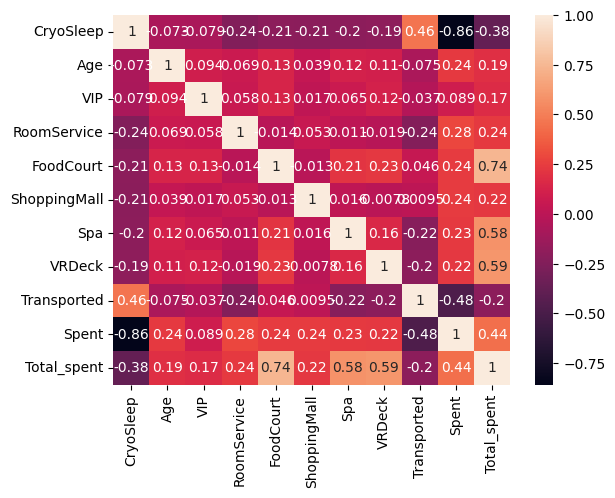

In [222]:
#Correlation among features 
feat = []
for i in df_train.columns :
    if df_train[i].dtype != 'object':
        feat.append(i)
df_train[feat] = df_train[feat].astype(np.float32)
sns.heatmap(data = df_train[feat].corr() , annot=True )

In [223]:
df_train.drop(columns = ['RoomService' , 'FoodCourt' , 'ShoppingMall' , 'Spa' , 'VRDeck'] , axis = 1 , inplace = True)

## Categorial Features

In [224]:
df_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,Name,Transported,Spent,Total_spent,Side,Deck
0,Europa,0.0,TRAPPIST-1e,39.0,0.0,Maham Ofracculy,0.0,0.0,0.0,P,B
1,Earth,0.0,TRAPPIST-1e,24.0,0.0,Juanna Vines,1.0,1.0,736.0,S,F
2,Europa,0.0,TRAPPIST-1e,58.0,1.0,Altark Susent,0.0,1.0,10383.0,S,A
3,Europa,0.0,TRAPPIST-1e,33.0,0.0,Solam Susent,0.0,1.0,5176.0,S,A
4,Earth,0.0,TRAPPIST-1e,16.0,0.0,Willy Santantines,1.0,1.0,1091.0,S,F


In [225]:
df_train.drop(columns='Name' ,axis = 1 , inplace = True)

In [226]:
df_train.head()


,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,Spent,Total_spent,Side,Deck
0,Europa,0.0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,P,B
1,Earth,0.0,TRAPPIST-1e,24.0,0.0,1.0,1.0,736.0,S,F
2,Europa,0.0,TRAPPIST-1e,58.0,1.0,0.0,1.0,10383.0,S,A
3,Europa,0.0,TRAPPIST-1e,33.0,0.0,0.0,1.0,5176.0,S,A
4,Earth,0.0,TRAPPIST-1e,16.0,0.0,1.0,1.0,1091.0,S,F


In [227]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler

col = ColumnTransformer(
    transformers=[
        ("transformer", OneHotEncoder(), ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']),
        #("scalar" , RobustScaler() , ["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"] )
    ],
    remainder="passthrough",
    n_jobs=-1
)

col.fit(df_train)
df_train = col.transform(df_train)


In [228]:
print(df_train[:5,:])

[[0.0000e+00 1.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 1.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  1.0000e+00 0.0000e+00 3.9000e+01 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 1.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 1.0000e+00 2.4000e+01 1.0000e+00 1.0000e+00 7.3600e+02]
 [0.0000e+00 1.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 1.0000e+00 0.0000e+00 1.0000e+00 1.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 1.0000e+00 5.8000e+01 0.0000e+00 1.0000e+00 1.0383e+04]
 [0.0000e+00 1.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 1.0000e+00 1.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00

## Modelling


In [229]:
X = np.concatenate((df_train[:,:-2] , df_train[:,-1].reshape(-1,1)) , axis = 1)

In [230]:
print(X[:5,:])

[[0.0000e+00 1.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 1.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  1.0000e+00 0.0000e+00 3.9000e+01 0.0000e+00 0.0000e+00]
 [1.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 1.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 1.0000e+00 2.4000e+01 1.0000e+00 7.3600e+02]
 [0.0000e+00 1.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 1.0000e+00 0.0000e+00 1.0000e+00 1.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 1.0000e+00 5.8000e+01 0.0000e+00 1.0383e+04]
 [0.0000e+00 1.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 1.0000e+00 1.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+

In [231]:
y = df_train[:,-2].astype(np.float32)
print(y)

[0. 1. 1. ... 1. 1. 1.]


In [232]:
from sklearn.model_selection import train_test_split
X_train ,X_valid , y_train , y_valid = train_test_split(X , y , random_state=69 , test_size=0.2)

In [233]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

models = {
    "RF" : RandomForestClassifier(),
    "DT" : DecisionTreeClassifier(),
    "CAT" : CatBoostClassifier(),
    "XGB" : XGBClassifier()

}
model_train_scores = []
model_valid_scores = []
model_names = []

for name , model in models.items() :
    model_names.append(name)
    model.fit(X_train,y_train)
    model_train_scores.append(model.score(X_train,y_train))
    model_valid_scores.append(model.score(X_valid,y_valid))



Learning rate set to 0.023392
0:	learn: 0.6139559	total: 1.95ms	remaining: 1.95s
1:	learn: 0.5493572	total: 3.68ms	remaining: 1.83s
2:	learn: 0.4854560	total: 5.44ms	remaining: 1.81s
3:	learn: 0.4307835	total: 7.11ms	remaining: 1.77s
4:	learn: 0.3934626	total: 8.79ms	remaining: 1.75s
5:	learn: 0.3463969	total: 10.4ms	remaining: 1.73s
6:	learn: 0.3131612	total: 12ms	remaining: 1.71s
7:	learn: 0.2765956	total: 13.6ms	remaining: 1.69s
8:	learn: 0.2505440	total: 15.3ms	remaining: 1.69s
9:	learn: 0.2230586	total: 17.3ms	remaining: 1.71s
10:	learn: 0.2022287	total: 18.8ms	remaining: 1.69s
11:	learn: 0.1818215	total: 20.5ms	remaining: 1.69s
12:	learn: 0.1608962	total: 22.5ms	remaining: 1.71s
13:	learn: 0.1440135	total: 24.5ms	remaining: 1.72s
14:	learn: 0.1282356	total: 26.7ms	remaining: 1.75s
15:	learn: 0.1151778	total: 28.6ms	remaining: 1.76s
16:	learn: 0.1034290	total: 30.6ms	remaining: 1.77s
17:	learn: 0.0920828	total: 32.5ms	remaining: 1.77s
18:	learn: 0.0822020	total: 34.5ms	remaining: 

In [234]:
print(model_names)
print(model_train_scores)
print(model_valid_scores)

['RF', 'DT', 'CAT', 'XGB']
[1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0]


In [235]:
#Dealing with Catboost

param_grid = {
    "iterations": [1500,2000],
    "learning_rate" : [0.01,0.009,0.03],
    "eval_metric" : ['Accuracy']
    
}

grid = GridSearchCV(CatBoostClassifier() , param_grid=param_grid , n_jobs=-1 , scoring='accuracy')

grid.fit(X_train,y_train)

0:	learn: 1.0000000	total: 2.85ms	remaining: 4.27s
1:	learn: 1.0000000	total: 12.6ms	remaining: 9.42s
0:	learn: 1.0000000	total: 18.8ms	remaining: 28.2s
1:	learn: 1.0000000	total: 21.7ms	remaining: 16.3s
0:	learn: 1.0000000	total: 2.42ms	remaining: 3.63s
0:	learn: 1.0000000	total: 5.28ms	remaining: 7.91s
2:	learn: 1.0000000	total: 32.7ms	remaining: 16.3s
1:	learn: 1.0000000	total: 16.4ms	remaining: 12.3s
2:	learn: 1.0000000	total: 45.5ms	remaining: 22.7s
2:	learn: 1.0000000	total: 24.7ms	remaining: 12.3s
3:	learn: 0.9998168	total: 49ms	remaining: 18.3s
1:	learn: 1.0000000	total: 28.6ms	remaining: 21.4s
0:	learn: 1.0000000	total: 10.4ms	remaining: 15.6s
3:	learn: 0.9998168	total: 34.6ms	remaining: 13s
0:	learn: 1.0000000	total: 2.76ms	remaining: 4.14s
1:	learn: 1.0000000	total: 13.4ms	remaining: 10s
4:	learn: 0.9992673	total: 58ms	remaining: 17.3s
1:	learn: 1.0000000	total: 6.39ms	remaining: 4.79s
2:	learn: 1.0000000	total: 8.7ms	remaining: 4.34s
3:	learn: 0.9998168	total: 11ms	remainin

11:	learn: 0.9985348	total: 150ms	remaining: 18.6s
12:	learn: 0.9996336	total: 181ms	remaining: 20.7s
9:	learn: 0.9992673	total: 186ms	remaining: 27.7s
10:	learn: 0.9992673	total: 188ms	remaining: 25.4s
3:	learn: 0.9996336	total: 169ms	remaining: 1m 3s
4:	learn: 0.9992673	total: 174ms	remaining: 51.9s
12:	learn: 0.9994505	total: 181ms	remaining: 20.7s
11:	learn: 0.9983513	total: 204ms	remaining: 25.3s
8:	learn: 1.0000000	total: 154ms	remaining: 25.5s
9:	learn: 0.9992673	total: 157ms	remaining: 23.4s
10:	learn: 0.9992673	total: 159ms	remaining: 21.5s
11:	learn: 0.9983513	total: 161ms	remaining: 20s
12:	learn: 0.9992673	total: 221ms	remaining: 25.3s
6:	learn: 0.9994504	total: 113ms	remaining: 24.1s
5:	learn: 1.0000000	total: 214ms	remaining: 53.4s
3:	learn: 0.9998168	total: 198ms	remaining: 1m 14s
13:	learn: 0.9996336	total: 241ms	remaining: 25.6s
7:	learn: 1.0000000	total: 122ms	remaining: 22.7s
8:	learn: 0.9998168	total: 125ms	remaining: 20.6s
0:	learn: 1.0000000	total: 66.3ms	remainin

GridSearchCV(estimator=<catboost.core.CatBoostClassifier object at 0x7f0da0311600>,
             n_jobs=-1,
             param_grid={'eval_metric': ['Accuracy'],
                         'iterations': [1500, 2000],
                         'learning_rate': [0.01, 0.009, 0.03]},
             scoring='accuracy')

In [236]:
from sklearn.metrics import accuracy_score
print(grid.best_score_)
print("The valid accuracy {}".format(accuracy_score(y_valid , grid.predict(X_valid)) ))
print(grid.best_params_)

1.0
The valid accuracy 1.0
{'eval_metric': 'Accuracy', 'iterations': 1500, 'learning_rate': 0.01}


In [237]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train,grid.predict(X_train))

array([[2872,    0],
       [   0, 3952]])